# A representative image of the data used

<img src="ex2.jpg" alt="Image Description" width="550">
<img src="ex1.png" alt="Image Description" width="900">






# Dataset Validation and Problem Statement
## 1. Dataset Overview:
- The dataset simulates customer feedback data for a **Aladdin Pharmacy** in Egypt.
- Total Records: 1,500 rows.
- Main Fields:
    - **customer_name:** Simulated customer names.
    - **gender:** Customer gender (Male/Female).
    - **medicine_name:** Name of the medicine.
    - **type:** Medicine category (e.g., Antibiotic, Pain Relief, Digestive Aid, etc.).
    - **customer_feedback:** Textual customer reviews.
    - **sentiment:** Sentiment classification (Positive, Negative, Neutral).
## 2. Problem Statement:
- Perform Sentiment Analysis on customer feedback to classify whether the review is Positive, Negative, or Neutral.
## 3. Tools and Frameworks:

- Data Processing & Modeling: Python (TensorFlow/Keras, Pandas, NLTK, Scikit-learn).
- Database: MongoDB for data storage and management.
- Backend: Flask/FastAPI for API development and MongoDB integration.
- Front-End: React.js or Vue.js for building an interactive dashboard.
## 4.Front-End Dashboard Features:

- Input Section:
    - User enters the customer feedback (text input).

- Output Section:
    - Immediate classification of sentiment: Positive, Negative, or Neutral.
## 5.Practical Benefits for the User:

- For Pharmacists/Managers:
    - Monitor medicines with frequent negative feedback for improvements.
    - Analyze customer trends and satisfaction levels.
    - Identify top-performing medicines based on positive reviews.

- For Staff:
    - Easily log and analyze customer feedback.
    - Generate interactive reports for better decision-making

# important library

In [2]:
import shutil
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import warnings
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import re
from tensorflow.keras.layers import (LSTM, Embedding, Dense, SpatialDropout1D, Dropout, Bidirectional, 
                                     GlobalAveragePooling1D, GRU, Conv1D, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.optimizers import Adam
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from pymongo import MongoClient
import joblib
from pymongo import MongoClient
import gridfs
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
from pymongo import MongoClient
import gridfs


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# import data
- take head(5) to show data

In [2]:
data = pd.read_csv('Aladdin_Pharmacy.csv')

data.head(5)

,id,customer_name,gender,medicine_name,type,customer_feedback,sentiment
0,1,Nora Nassar,Female,Cipro,Antibiotic,A great and effective medicine for diarrhea.,Positive
1,2,Mia Farag,Female,Clarinase,Decongestant,Excellent for chronic headache pain.,Negative
2,3,Amira Johnson,Female,Motilium,Digestive Aid,Highly recommend it for treating infections.,Negative
3,4,Michael Taha,Male,Strepsils,Throat Relief,A great and effective medicine for diarrhea.,Negative
4,5,Emma Hassan,Female,Paracetamol,Pain Relief,I felt much better after using it.,Neutral


# describe
- The describe method shows count (The number of not-empty values),mean (The average (mean) value),std (The standard deviation)<br>
min(the minimum value),25% -(The 25% percentile*),50% (The 50% percentile*),75% (The 75% percentile*),max (the maximum value)<br>
for each column in the dataset <br>

In [3]:
data.describe()

,id
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


# information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2500 non-null   int64 
 1   customer_name      2500 non-null   object
 2   gender             2500 non-null   object
 3   medicine_name      2500 non-null   object
 4   type               2500 non-null   object
 5   customer_feedback  2500 non-null   object
 6   sentiment          2500 non-null   object
dtypes: int64(1), object(6)
memory usage: 136.8+ KB


# delete duplicated

In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().any()

False

# show total nan value

In [8]:
print(f"Null values per column : \n\n{data.isna().sum()}")

Null values per column : 

id                   0
customer_name        0
gender               0
medicine_name        0
type                 0
customer_feedback    0
sentiment            0
dtype: int64


# Number of features per class or number of inputs per classes
-    excluding 'customer_name' and 'medicine_name'

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns.difference(['customer_name', 'medicine_name'])

print("Number of Inputs Per Class:")
for col in categorical_columns:
    print(f"\nClass Distribution for '{col}':")
    print(data[col].value_counts())

num_features = data.drop(columns=['customer_name', 'medicine_name']).shape[1]
print(f"\nTotal Number of Features (Columns): {num_features}")

if 'sentiment' in data.columns:
    sentiment_classes = data['sentiment'].value_counts()
    print("\nNumber of Inputs Per Sentiment Class:")
    print(sentiment_classes)


Number of Inputs Per Class:

Class Distribution for 'customer_feedback':
customer_feedback
It is effective but has minor side effects.          165
Good medicine with a reasonable price.               164
The price is good, but it is slow to take effect.    157
Fast-acting but causes nausea sometimes.             157
A great and effective medicine for diarrhea.         149
Highly recommend it for treating infections.         144
Unfortunately, I did not feel any improvement.       144
Excellent for chronic headache pain.                 143
The medicine is excellent and very effective.        140
I felt much better after using it.                   137
It did the job, nothing to complain about.            76
It didn't help at all, very disappointing.            74
A great product, I feel so much better now.           72
It's fine, but I expected more improvement.           71
The product was okay, not exceptional.                71
This product was completely ineffective.              

# Top Medicines by Sentiment
- Group by sentiment and count medicines
- Get top 5 medicines per sentiment
- Display result

In [10]:
top_medicines = data.groupby(['sentiment', 'medicine_name']).size().reset_index(name='count')

top_positive = top_medicines[top_medicines['sentiment'] == 'Positive'].nlargest(5, 'count').reset_index(drop=True)
top_negative = top_medicines[top_medicines['sentiment'] == 'Negative'].nlargest(5, 'count').reset_index(drop=True)
top_neutral = top_medicines[top_medicines['sentiment'] == 'Neutral'].nlargest(5, 'count').reset_index(drop=True)

print("Top 5 Medicines with Positive Sentiment:")
print(top_positive)

print("\nTop 5 Medicines with Negative Sentiment:")
print(top_negative)

print("\nTop 5 Medicines with Neutral Sentiment:")
print(top_neutral)


Top 5 Medicines with Positive Sentiment:
  sentiment medicine_name  count
0  Positive      Voltaren     45
1  Positive        Nexium     44
2  Positive        Brufen     43
3  Positive      Cataflam     41
4  Positive         Cipro     40

Top 5 Medicines with Negative Sentiment:
  sentiment medicine_name  count
0  Negative     Strepsils     53
1  Negative      Euthyrox     52
2  Negative        Zyrtec     50
3  Negative        Nexium     43
4  Negative          Adol     42

Top 5 Medicines with Neutral Sentiment:
  sentiment    medicine_name  count
0   Neutral          Antinal     44
1   Neutral           Brufen     42
2   Neutral    Panadol Extra     39
3   Neutral             Adol     38
4   Neutral  Spasmo Digestin     38


# Sentiment Distribution Analysis


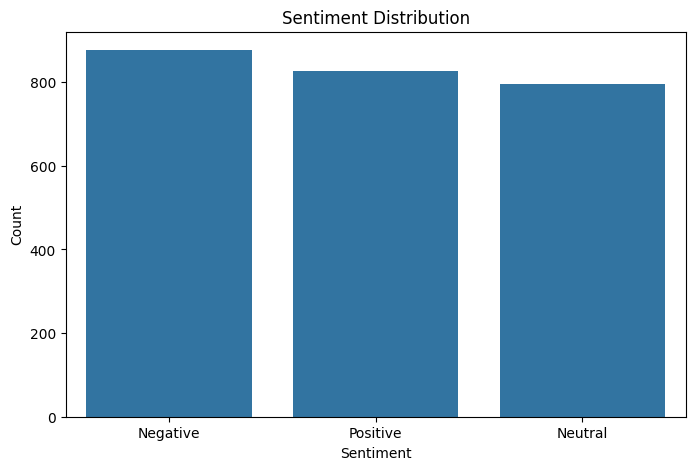

In [11]:
sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Sentiment distribution by type

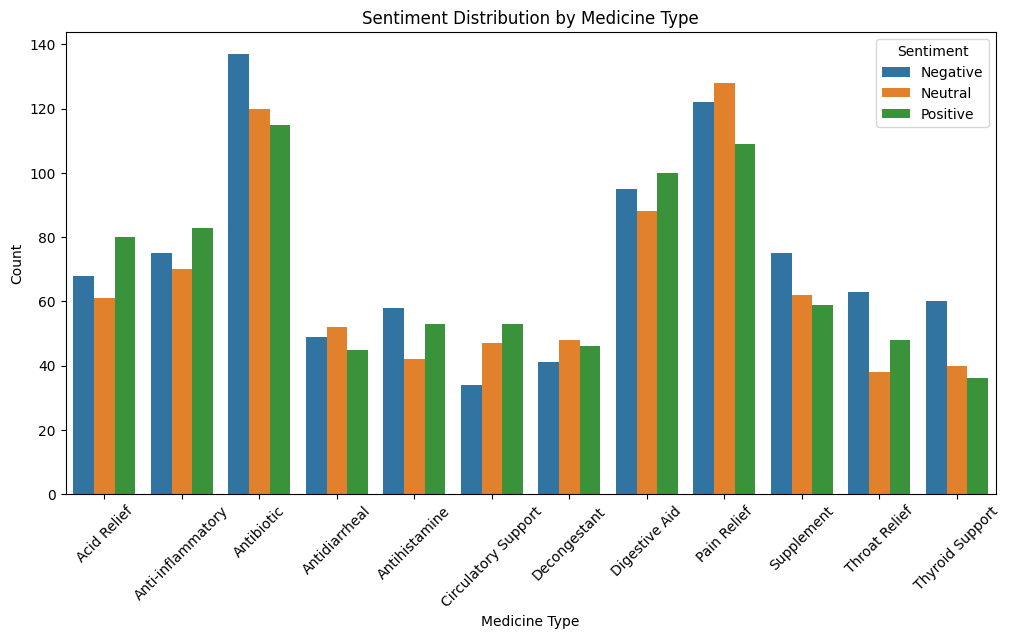

In [12]:

sentiment_by_type = data.groupby(['type', 'sentiment']).size().reset_index(name='count')


plt.figure(figsize=(12, 6))
sns.barplot(x='type', y='count', hue='sentiment', data=sentiment_by_type)
plt.title('Sentiment Distribution by Medicine Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Medicine Type')
plt.legend(title='Sentiment')
plt.show()


# Sentiment distribution by gender

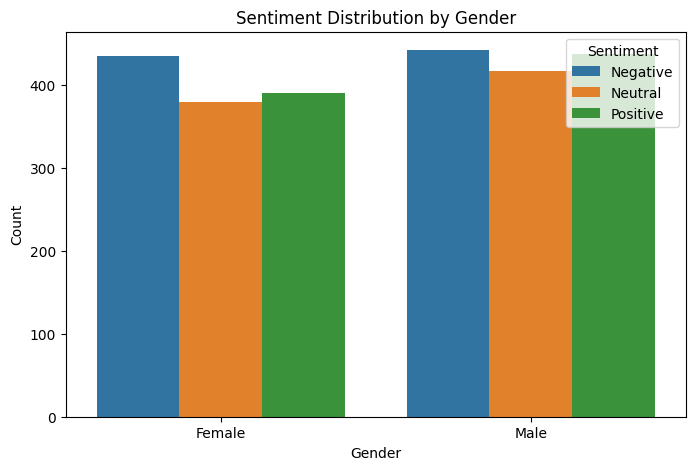

In [13]:
sentiment_by_gender = data.groupby(['gender', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='count', hue='sentiment', data=sentiment_by_gender)
plt.title('Sentiment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


# Encode Categorical Data for Correlation
- sentiment
    - Positive = 2, Neutral = 1, Negative = 0
- gender
    - Male = 1, Female = 0
- type
    - Encode medicine type 0 to n

In [14]:
label_encoder_sentiment = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_type = LabelEncoder()

df_encoded = data.copy()


df_encoded['sentiment'] = label_encoder_sentiment.fit_transform(data['sentiment'])
df_encoded['gender'] = label_encoder_gender.fit_transform(data['gender'])
df_encoded['type'] = label_encoder_type.fit_transform(data['type'])

print(df_encoded.head())




   id  customer_name  gender medicine_name  type  \
0   1    Nora Nassar       0         Cipro     2   
1   2      Mia Farag       0     Clarinase     6   
2   3  Amira Johnson       0      Motilium     7   
3   4   Michael Taha       1     Strepsils    10   
4   5    Emma Hassan       0   Paracetamol     8   

                              customer_feedback  sentiment  
0  A great and effective medicine for diarrhea.          2  
1          Excellent for chronic headache pain.          0  
2  Highly recommend it for treating infections.          0  
3  A great and effective medicine for diarrhea.          0  
4            I felt much better after using it.          1  


# correlation matrix
- Drop non-numeric and unnecessary columns


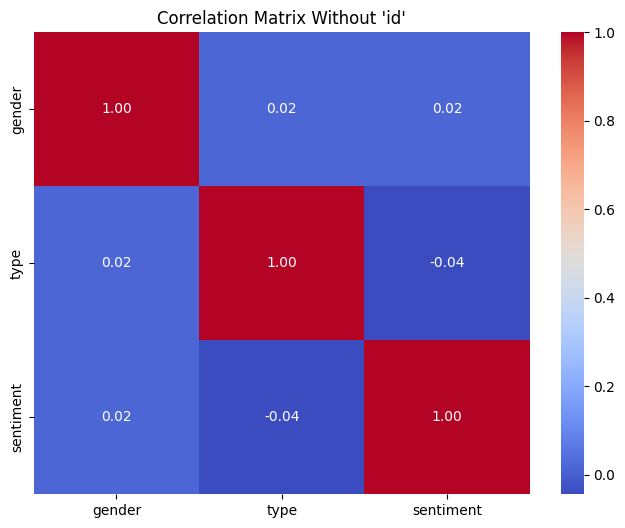

In [15]:
df_numeric = df_encoded.drop(columns=['id', 'customer_name', 'medicine_name', 'customer_feedback'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Without 'id'")
plt.show()




# Feature normalization
- Min MaxScaler 
    - 0 -> 1
- StandardScaler 
    - Returns values ​​with mean = 0 and standard deviation = 1.

In [16]:
numeric_cols = data.select_dtypes(include=['number']).columns
data_numeric = data[numeric_cols]

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


data_minmax = pd.DataFrame(minmax_scaler.fit_transform(data_numeric), columns=numeric_cols)


data_standard = pd.DataFrame(standard_scaler.fit_transform(data_numeric), columns=numeric_cols)


data_minmax = data_minmax.add_prefix('MinMax_')
data_standard = data_standard.add_prefix('Standard_')


normalized_data = pd.concat([data_numeric, data_minmax, data_standard], axis=1)


print(" Min-Max Scaled, and Standardized Data:")
print(normalized_data.head())



 Min-Max Scaled, and Standardized Data:
   id  MinMax_id  Standard_id
0   1   0.000000    -1.731358
1   2   0.000400    -1.729972
2   3   0.000800    -1.728587
3   4   0.001200    -1.727201
4   5   0.001601    -1.725816


# Regularization Overview:
## Regularization is used to prevent overfitting by penalizing large weights in a model.
   - L1 Regularization (Lasso):
       - Adds the absolute value of the weights as a penalty.
       - Encourages sparse solutions (some weights become zero).
   - L2 Regularization (Ridge):
       - Adds the square of the weights as a penalty.
       - Reduces the magnitude of weights without making them zero.

In [17]:
X = data.drop(columns=["sentiment", "id", "customer_name"]) 
Y = data["sentiment"]  

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

categorical_columns = ['gender', 'medicine_name', 'type']  
column_transformer = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])


X_encoded = column_transformer.fit_transform(X)


vectorizer = TfidfVectorizer(stop_words='english')
X_feedback = vectorizer.fit_transform(X['customer_feedback'])  

X_final = np.hstack([X_encoded.toarray(), X_feedback.toarray()])

scaler = StandardScaler(with_mean=False)  
X_scaled = scaler.fit_transform(X_final)


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)


def APPLY_REGULARIZATION(reg):
    
    reg.fit(X_train, Y_train)
    
   
    print("Best alpha using built-in {}: %.6f".format(str(reg).split('.')[-1]) % reg.alpha_)
    print("Best score using built-in {}: %.6f".format(str(reg).split('.')[-1]) % reg.score(X_train, Y_train))
  
  
    categorical_feature_names = column_transformer.get_feature_names_out()  
    text_feature_names = vectorizer.get_feature_names_out()  
    feature_names = np.concatenate([categorical_feature_names, text_feature_names])  

    coef = pd.Series(reg.coef_, index=feature_names)  
    print("{} picked ".format(str(reg).split('.')[-1]) + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")
    
   
    imp_coef = coef.sort_values()
    print(imp_coef)


APPLY_REGULARIZATION(ElasticNetCV(cv=5, random_state=42, l1_ratio=0.5))  
APPLY_REGULARIZATION(RidgeCV())  
APPLY_REGULARIZATION(LassoCV()) 


Best alpha using built-in ElasticNetCV(cv=5, random_state=42): 0.009400
Best score using built-in ElasticNetCV(cv=5, random_state=42): 0.398429
ElasticNetCV(cv=5, random_state=42) picked 69 variables and eliminated the other 31 variables
minor         -0.181241
felt          -0.083116
using         -0.082647
completely    -0.081665
ineffective   -0.080723
                 ...   
satisfied      0.054629
results        0.065343
amazing        0.067262
better         0.204150
effects        0.215231
Length: 100, dtype: float64
Best alpha using built-in RidgeCV(): 10.000000
Best score using built-in RidgeCV(): 0.400711
RidgeCV() picked 100 variables and eliminated the other 0 variables
minor         -0.208259
completely    -0.096567
ineffective   -0.096567
quality       -0.070015
poor          -0.070015
                 ...   
results        0.068669
feel           0.085506
effective      0.085868
better         0.099554
effects        0.173783
Length: 100, dtype: float64
Best alpha using 

# Model preprocessing 
## 1. Data Preprocessing:
- Text cleaned (lowercased, punctuation/numbers removed, lemmatized, stopwords removed).
- Tokenized and padded to fixed length.
- Sentiment labels encoded (One-Hot).
## 2. Model Architecture:

- **Embedding Layer**: Converts words to 100-dim vectors.
- **Conv1D + Bidirectional LSTM**: Extract patterns and contextual features.
- **BatchNormalization + Dropout**: Prevent overfitting and stabilize training.
- **Dense Layer**: L2 regularized with softmax output for 3 classes.
## 3. Training:

- EarlyStopping: Stops training on validation loss plateau.
- ReduceLROnPlateau: Reduces learning rate when validation loss stagnates.

## 4. Evaluation:

- Plots for accuracy and loss (train vs validation).
- Test accuracy and loss printed.

# Text Cleaning

In [18]:

def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text.strip()

data['customer_feedback_cleaned'] = data['customer_feedback'].apply(clean_text)

# Label Encoding

In [19]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['sentiment'])
y = pd.get_dummies(y).values

# Tokenization and Padding

In [20]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['customer_feedback_cleaned'])
sequences = tokenizer.texts_to_sequences(data['customer_feedback_cleaned'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

X = padded_sequences
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
models_accuracy = []

# from scratch
## 1. Model Building
## 2. Compile the Model
## 3. Train the Model
## 4. Evaluate the Model



In [22]:
embedding_dim = 100
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    SpatialDropout1D(0.3),
    BatchNormalization(),
    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True)), #(batch_size=, time_steps=, units=)
    BatchNormalization(),
    GlobalAveragePooling1D(),
    Dense(128, activation='relu', kernel_regularizer='l2'), 
    Dropout(0.4),
    Dense(3, activation='softmax')  
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5)

history = model.fit(X_train, y_train,
                    epochs=30,              
                    batch_size=64,          
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

from_scratch_accuracy = accuracy  
models_accuracy.append({"model": "From Scratch", "accuracy": from_scratch_accuracy})



Epoch 1/30


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.3261 - loss: 3.1989 - val_accuracy: 0.3240 - val_loss: 2.5456 - learning_rate: 0.0010
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3438 - loss: 2.7408 - val_accuracy: 0.3440 - val_loss: 2.3309 - learning_rate: 0.0010
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3383 - loss: 2.4402 - val_accuracy: 0.3240 - val_loss: 2.1515 - learning_rate: 0.0010
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3342 - loss: 2.2495 - val_accuracy: 0.3240 - val_loss: 2.0027 - learning_rate: 0.0010
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.3447 - loss: 2.0691 - val_accuracy: 0.3320 - val_loss: 1.8769 - learning_rate: 0.0010
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.3553 - loss: 1.9208 - val_accuracy: 0.3320 - val_loss: 1.7695 - learning_rate: 0.0010
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3290 - loss: 1.8206 - val_accuracy: 0.33


# 5.  Plot Accuracy and Loss

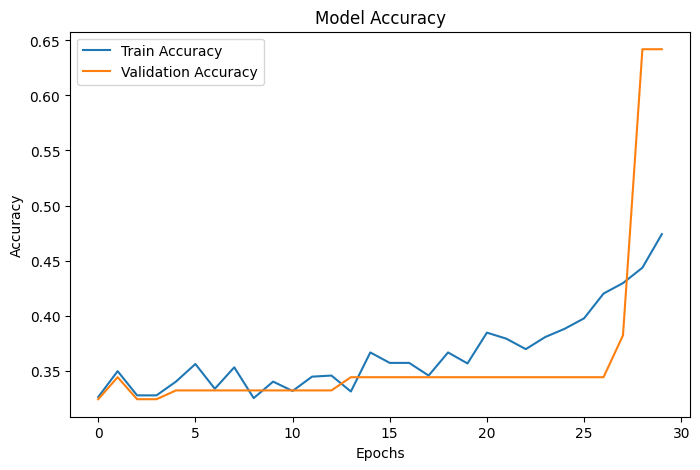

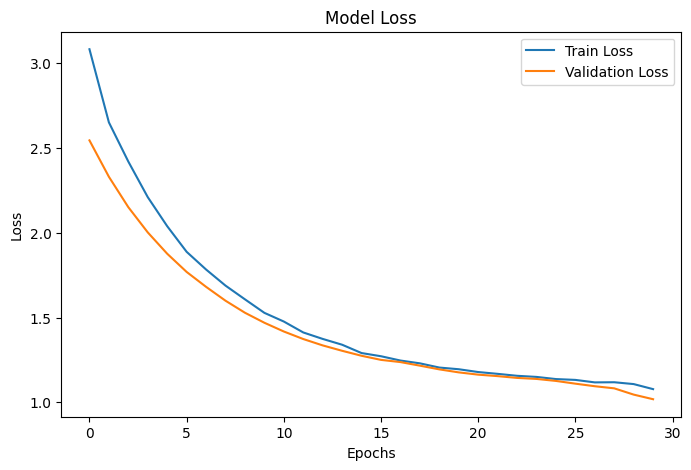

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 96, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 96, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 96, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,085,611 (15.59 MB)

 Trainable params: 1,361,547 (5.19 MB)

 Non-trainable params: 968 (3.78 KB)

 Optimizer params: 2,723,096 (10.39 MB)

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.summary()


# GloVe Embeddings
## 1. Load GloVe Embeddings
## 2. Model Building
## 3. Compile the Model
## 4. Training Callbacks
## 5. Train the Model
## 6. Evaluate the Model


In [24]:
#===================================================================================

#  Load GloVe Embeddings
#===========================

def load_glove_embeddings(filepath, tokenizer, max_words, embedding_dim=100):
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((max_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        if i < max_words:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding_dim = 100
embedding_matrix = load_glove_embeddings('glove.6B.100d.txt', tokenizer, max_words, embedding_dim)
#===================================================================================

#  Model Building
#=====================

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True),
    SpatialDropout1D(0.4),
    Bidirectional(LSTM(256, return_sequences=True)),
    Bidirectional(LSTM(128)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
#===================================================================================

#  Compile the Model
#=======================

optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#===================================================================================

#  Training Callbacks
#========================

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)
#===================================================================================

#  Train the Model
#=====================
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop, reduce_lr])
#===================================================================================

#  Evaluate the Model
#========================
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

glove_accuracy = accuracy  
models_accuracy.append({"model": "GloVe Embeddings", "accuracy": glove_accuracy})


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 257ms/step - accuracy: 0.4027 - loss: 2.8523 - val_accuracy: 0.5800 - val_loss: 2.4376 - learning_rate: 5.0000e-04
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.5927 - loss: 2.2283 - val_accuracy: 0.6180 - val_loss: 2.1744 - learning_rate: 5.0000e-04
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 509ms/step - accuracy: 0.5950 - loss: 1.9375 - val_accuracy: 0.5940 - val_loss: 1.9656 - learning_rate: 5.0000e-04
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 328ms/step - accuracy: 0.6062 - loss: 1.6857 - val_accuracy: 0.6020 - val_loss: 1.7942 - learning_rate: 5.0000e-04
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 550ms/step - accuracy: 0.6203 - loss: 1.5225 - val_accuracy: 0.6200 - val_loss: 1.6599 - learning_rate: 5.0000e-04
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.6158 - loss: 1.4095 - val_accuracy: 0.6100 - val_loss: 1.5263 - learning_rate: 5.0000e-04
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accur

# 7. Plot Accuracy and Loss

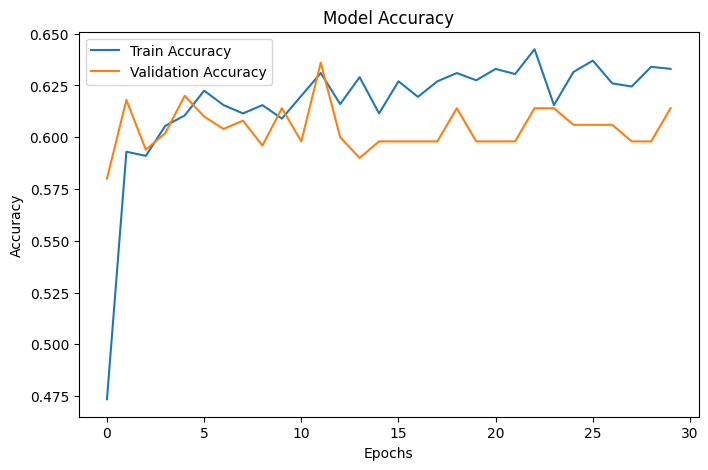

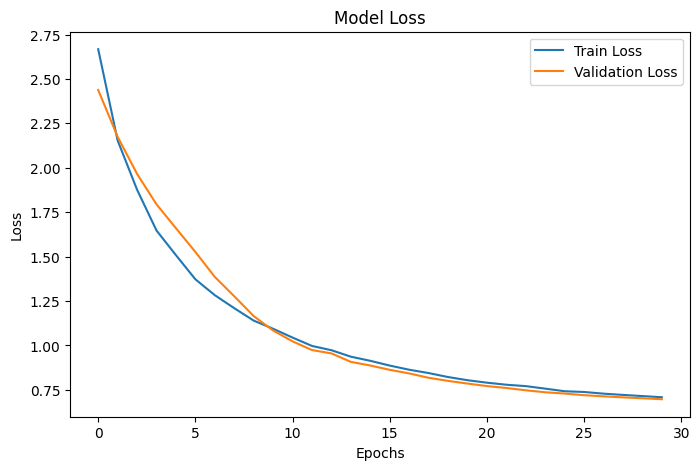

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 100, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100, 512)       │       731,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,264,459 (27.71 MB)

 Trainable params: 2,421,315 (9.24 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 4,842,632 (18.47 MB)

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
model.summary()

# Logistic Regression Model

In [26]:
label_encoder = LabelEncoder()
data['encoded_sentiment'] = label_encoder.fit_transform(data['sentiment'])


X_train, X_test, y_train, y_test = train_test_split(
    data['customer_feedback_cleaned'], data['encoded_sentiment'], test_size=0.2, random_state=42
)


vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2)) 
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


model = LogisticRegression(max_iter=1000, solver='liblinear') 
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

logistic_regression_accuracy = accuracy_score(y_test, y_pred) 
models_accuracy.append({"model": "Logistic Regression", "accuracy": logistic_regression_accuracy})



Test Accuracy: 0.5980
Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.73      0.60       172
     Neutral       0.78      0.51      0.62       162
    Positive       0.63      0.54      0.58       166

    accuracy                           0.60       500
   macro avg       0.64      0.60      0.60       500
weighted avg       0.64      0.60      0.60       500



# Pre-trained DistilBERT Model

In [27]:
# Reset indices after train_test_split
#===================================================================================

X_train = pd.DataFrame(X_train).reset_index(drop=True)
y_train = pd.DataFrame(y_train).reset_index(drop=True)
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)

#===================================================================================

#  Tokenize Data using DistilBERT Tokenizer
#===============================================

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=64):
     
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=max_len)
        self.labels = torch.tensor(labels.values.flatten() if isinstance(labels, pd.DataFrame) else labels, dtype=torch.long)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

X_train_series = X_train.iloc[:, 0] if isinstance(X_train, pd.DataFrame) else X_train
X_test_series = X_test.iloc[:, 0] if isinstance(X_test, pd.DataFrame) else X_test

train_dataset = SentimentDataset(X_train_series, y_train, tokenizer)
test_dataset = SentimentDataset(X_test_series, y_test, tokenizer)

#===================================================================================

#  Load Pre-trained DistilBERT Model
#=======================================

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

#===================================================================================

#  Define Metrics for Accuracy
#===================================

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

#===================================================================================

#  Training Setup
#=======================

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=0,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics  
)

#===================================================================================

#  Train and Evaluate the Model
#===================================

trainer.train()

#===================================================================================

# Evaluate
#============

eval_result = trainer.evaluate()
print(f"Test Loss: {eval_result['eval_loss']:.4f}, Test Accuracy: {eval_result['eval_accuracy']:.4f}")

distilbert_accuracy = eval_result['eval_accuracy']  
models_accuracy.append({"model": "DistilBERT", "accuracy": distilbert_accuracy})





Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  1%|▏         | 10/750 [00:03<04:18,  2.86it/s]

{'loss': 1.092, 'grad_norm': 2.927361011505127, 'learning_rate': 4.933333333333334e-05, 'epoch': 0.04}


  3%|▎         | 20/750 [00:07<04:20,  2.81it/s]

{'loss': 1.0283, 'grad_norm': 1.513842225074768, 'learning_rate': 4.866666666666667e-05, 'epoch': 0.08}


  4%|▍         | 30/750 [00:10<03:48,  3.15it/s]

{'loss': 0.9607, 'grad_norm': 2.2217464447021484, 'learning_rate': 4.8e-05, 'epoch': 0.12}


  5%|▌         | 40/750 [00:13<03:51,  3.07it/s]

{'loss': 0.9863, 'grad_norm': 2.3832545280456543, 'learning_rate': 4.7333333333333336e-05, 'epoch': 0.16}


  7%|▋         | 50/750 [00:17<04:03,  2.88it/s]

{'loss': 0.9569, 'grad_norm': 3.0609006881713867, 'learning_rate': 4.666666666666667e-05, 'epoch': 0.2}


  8%|▊         | 60/750 [00:20<03:56,  2.92it/s]

{'loss': 0.8422, 'grad_norm': 3.191749095916748, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.24}


  9%|▉         | 70/750 [00:24<04:08,  2.74it/s]

{'loss': 0.8515, 'grad_norm': 2.8436741828918457, 'learning_rate': 4.5333333333333335e-05, 'epoch': 0.28}


 11%|█         | 80/750 [00:27<04:02,  2.76it/s]

{'loss': 0.7674, 'grad_norm': 4.327706813812256, 'learning_rate': 4.466666666666667e-05, 'epoch': 0.32}


 12%|█▏        | 90/750 [00:31<03:29,  3.14it/s]

{'loss': 0.7222, 'grad_norm': 4.619027137756348, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.36}


 13%|█▎        | 100/750 [00:35<04:38,  2.33it/s]

{'loss': 0.7313, 'grad_norm': 3.892507791519165, 'learning_rate': 4.3333333333333334e-05, 'epoch': 0.4}


 15%|█▍        | 110/750 [00:39<04:40,  2.28it/s]

{'loss': 0.7642, 'grad_norm': 3.8008005619049072, 'learning_rate': 4.266666666666667e-05, 'epoch': 0.44}


 16%|█▌        | 120/750 [00:43<04:01,  2.60it/s]

{'loss': 0.6943, 'grad_norm': 3.07096529006958, 'learning_rate': 4.2e-05, 'epoch': 0.48}


 17%|█▋        | 130/750 [00:46<03:09,  3.27it/s]

{'loss': 0.8102, 'grad_norm': 5.030052661895752, 'learning_rate': 4.133333333333333e-05, 'epoch': 0.52}


 19%|█▊        | 140/750 [00:49<03:06,  3.28it/s]

{'loss': 0.6812, 'grad_norm': 3.379796028137207, 'learning_rate': 4.066666666666667e-05, 'epoch': 0.56}


 20%|██        | 150/750 [00:52<03:00,  3.33it/s]

{'loss': 0.596, 'grad_norm': 1.7087795734405518, 'learning_rate': 4e-05, 'epoch': 0.6}


 21%|██▏       | 160/750 [00:55<02:58,  3.31it/s]

{'loss': 0.6911, 'grad_norm': 2.639669179916382, 'learning_rate': 3.933333333333333e-05, 'epoch': 0.64}


 23%|██▎       | 170/750 [00:58<02:56,  3.29it/s]

{'loss': 0.7392, 'grad_norm': 3.3243789672851562, 'learning_rate': 3.866666666666667e-05, 'epoch': 0.68}


 24%|██▍       | 180/750 [01:02<02:52,  3.30it/s]

{'loss': 0.6774, 'grad_norm': 2.6984262466430664, 'learning_rate': 3.8e-05, 'epoch': 0.72}


 25%|██▌       | 190/750 [01:05<02:52,  3.25it/s]

{'loss': 0.6601, 'grad_norm': 1.9802061319351196, 'learning_rate': 3.733333333333334e-05, 'epoch': 0.76}


 27%|██▋       | 200/750 [01:08<02:48,  3.27it/s]

{'loss': 0.6, 'grad_norm': 2.0620715618133545, 'learning_rate': 3.6666666666666666e-05, 'epoch': 0.8}


 28%|██▊       | 210/750 [01:11<02:46,  3.25it/s]

{'loss': 0.7485, 'grad_norm': 2.7483158111572266, 'learning_rate': 3.6e-05, 'epoch': 0.84}


 29%|██▉       | 220/750 [01:14<02:41,  3.28it/s]

{'loss': 0.7795, 'grad_norm': 5.646518707275391, 'learning_rate': 3.5333333333333336e-05, 'epoch': 0.88}


 31%|███       | 230/750 [01:17<02:40,  3.23it/s]

{'loss': 0.6412, 'grad_norm': 2.5213067531585693, 'learning_rate': 3.466666666666667e-05, 'epoch': 0.92}


 32%|███▏      | 240/750 [01:20<02:35,  3.27it/s]

{'loss': 0.7459, 'grad_norm': 3.144157648086548, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.96}


 33%|███▎      | 250/750 [01:23<02:32,  3.28it/s]

{'loss': 0.6845, 'grad_norm': 3.0674691200256348, 'learning_rate': 3.3333333333333335e-05, 'epoch': 1.0}


                                                 
 33%|███▎      | 250/750 [01:25<02:32,  3.28it/s]

{'eval_loss': 0.6602984666824341, 'eval_accuracy': 0.632, 'eval_precision': 0.7121703593371811, 'eval_recall': 0.632, 'eval_f1': 0.6290776849175975, 'eval_runtime': 1.8386, 'eval_samples_per_second': 271.952, 'eval_steps_per_second': 34.266, 'epoch': 1.0}


 35%|███▍      | 260/750 [01:29<02:44,  2.97it/s]

{'loss': 0.7536, 'grad_norm': 1.2689762115478516, 'learning_rate': 3.266666666666667e-05, 'epoch': 1.04}


 36%|███▌      | 270/750 [01:32<02:28,  3.24it/s]

{'loss': 0.5799, 'grad_norm': 2.6760525703430176, 'learning_rate': 3.2000000000000005e-05, 'epoch': 1.08}


 37%|███▋      | 280/750 [01:35<02:22,  3.30it/s]

{'loss': 0.6855, 'grad_norm': 2.4695637226104736, 'learning_rate': 3.1333333333333334e-05, 'epoch': 1.12}


 39%|███▊      | 290/750 [01:38<02:21,  3.25it/s]

{'loss': 0.6835, 'grad_norm': 3.2059860229492188, 'learning_rate': 3.066666666666667e-05, 'epoch': 1.16}


 40%|████      | 300/750 [01:41<02:20,  3.21it/s]

{'loss': 0.6863, 'grad_norm': 2.4489362239837646, 'learning_rate': 3e-05, 'epoch': 1.2}


 41%|████▏     | 310/750 [01:44<02:14,  3.26it/s]

{'loss': 0.7385, 'grad_norm': 1.8006290197372437, 'learning_rate': 2.9333333333333336e-05, 'epoch': 1.24}


 43%|████▎     | 320/750 [01:47<02:12,  3.26it/s]

{'loss': 0.7214, 'grad_norm': 2.4751827716827393, 'learning_rate': 2.8666666666666668e-05, 'epoch': 1.28}


 44%|████▍     | 330/750 [01:50<02:08,  3.27it/s]

{'loss': 0.68, 'grad_norm': 2.7322514057159424, 'learning_rate': 2.8000000000000003e-05, 'epoch': 1.32}


 45%|████▌     | 340/750 [01:53<02:04,  3.28it/s]

{'loss': 0.6845, 'grad_norm': 1.5771000385284424, 'learning_rate': 2.733333333333333e-05, 'epoch': 1.36}


 47%|████▋     | 350/750 [01:56<02:03,  3.24it/s]

{'loss': 0.6586, 'grad_norm': 2.1805660724639893, 'learning_rate': 2.6666666666666667e-05, 'epoch': 1.4}


 48%|████▊     | 360/750 [01:59<02:02,  3.19it/s]

{'loss': 0.6174, 'grad_norm': 1.3653647899627686, 'learning_rate': 2.6000000000000002e-05, 'epoch': 1.44}


 49%|████▉     | 370/750 [02:02<01:57,  3.25it/s]

{'loss': 0.6294, 'grad_norm': 2.6279513835906982, 'learning_rate': 2.5333333333333337e-05, 'epoch': 1.48}


 51%|█████     | 380/750 [02:06<01:55,  3.20it/s]

{'loss': 0.5665, 'grad_norm': 1.5214241743087769, 'learning_rate': 2.466666666666667e-05, 'epoch': 1.52}


 52%|█████▏    | 390/750 [02:09<01:50,  3.25it/s]

{'loss': 0.7094, 'grad_norm': 2.2831430435180664, 'learning_rate': 2.4e-05, 'epoch': 1.56}


 53%|█████▎    | 400/750 [02:12<01:49,  3.20it/s]

{'loss': 0.622, 'grad_norm': 1.795558214187622, 'learning_rate': 2.3333333333333336e-05, 'epoch': 1.6}


 55%|█████▍    | 410/750 [02:15<01:45,  3.22it/s]

{'loss': 0.5376, 'grad_norm': 1.3255743980407715, 'learning_rate': 2.2666666666666668e-05, 'epoch': 1.64}


 56%|█████▌    | 420/750 [02:18<01:43,  3.20it/s]

{'loss': 0.4967, 'grad_norm': 1.1358234882354736, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.68}


 57%|█████▋    | 430/750 [02:21<01:39,  3.22it/s]

{'loss': 0.63, 'grad_norm': 1.9627690315246582, 'learning_rate': 2.1333333333333335e-05, 'epoch': 1.72}


 59%|█████▊    | 440/750 [02:24<01:36,  3.21it/s]

{'loss': 0.7404, 'grad_norm': 2.835160493850708, 'learning_rate': 2.0666666666666666e-05, 'epoch': 1.76}


 60%|██████    | 450/750 [02:27<01:38,  3.05it/s]

{'loss': 0.733, 'grad_norm': 1.8923633098602295, 'learning_rate': 2e-05, 'epoch': 1.8}


 61%|██████▏   | 460/750 [02:31<01:34,  3.07it/s]

{'loss': 0.7146, 'grad_norm': 2.424905776977539, 'learning_rate': 1.9333333333333333e-05, 'epoch': 1.84}


 63%|██████▎   | 470/750 [02:35<01:53,  2.47it/s]

{'loss': 0.6912, 'grad_norm': 1.3112890720367432, 'learning_rate': 1.866666666666667e-05, 'epoch': 1.88}


 64%|██████▍   | 480/750 [02:39<01:52,  2.39it/s]

{'loss': 0.6432, 'grad_norm': 2.0060513019561768, 'learning_rate': 1.8e-05, 'epoch': 1.92}


 65%|██████▌   | 490/750 [02:42<01:21,  3.21it/s]

{'loss': 0.6981, 'grad_norm': 2.467012405395508, 'learning_rate': 1.7333333333333336e-05, 'epoch': 1.96}


 67%|██████▋   | 500/750 [02:45<01:16,  3.25it/s]

{'loss': 0.7573, 'grad_norm': 2.281698226928711, 'learning_rate': 1.6666666666666667e-05, 'epoch': 2.0}


                                                 
 67%|██████▋   | 500/750 [02:47<01:16,  3.25it/s]

{'eval_loss': 0.6581098437309265, 'eval_accuracy': 0.636, 'eval_precision': 0.6578920260925482, 'eval_recall': 0.636, 'eval_f1': 0.6345436425687074, 'eval_runtime': 1.8181, 'eval_samples_per_second': 275.018, 'eval_steps_per_second': 34.652, 'epoch': 2.0}


 68%|██████▊   | 510/750 [02:51<01:21,  2.93it/s]

{'loss': 0.6432, 'grad_norm': 1.7850396633148193, 'learning_rate': 1.6000000000000003e-05, 'epoch': 2.04}


 69%|██████▉   | 520/750 [02:54<01:11,  3.21it/s]

{'loss': 0.5801, 'grad_norm': 1.8972893953323364, 'learning_rate': 1.5333333333333334e-05, 'epoch': 2.08}


 71%|███████   | 530/750 [02:57<01:07,  3.27it/s]

{'loss': 0.6886, 'grad_norm': 2.0498132705688477, 'learning_rate': 1.4666666666666668e-05, 'epoch': 2.12}


 72%|███████▏  | 540/750 [03:00<01:03,  3.30it/s]

{'loss': 0.6677, 'grad_norm': 2.382749080657959, 'learning_rate': 1.4000000000000001e-05, 'epoch': 2.16}


 73%|███████▎  | 550/750 [03:03<01:01,  3.24it/s]

{'loss': 0.658, 'grad_norm': 2.5009472370147705, 'learning_rate': 1.3333333333333333e-05, 'epoch': 2.2}


 75%|███████▍  | 560/750 [03:06<00:58,  3.26it/s]

{'loss': 0.6983, 'grad_norm': 2.597581624984741, 'learning_rate': 1.2666666666666668e-05, 'epoch': 2.24}


 76%|███████▌  | 570/750 [03:09<00:55,  3.23it/s]

{'loss': 0.692, 'grad_norm': 1.9650548696517944, 'learning_rate': 1.2e-05, 'epoch': 2.28}


 77%|███████▋  | 580/750 [03:12<00:52,  3.26it/s]

{'loss': 0.7013, 'grad_norm': 2.076416015625, 'learning_rate': 1.1333333333333334e-05, 'epoch': 2.32}


 79%|███████▊  | 590/750 [03:15<00:49,  3.24it/s]

{'loss': 0.7297, 'grad_norm': 3.2013349533081055, 'learning_rate': 1.0666666666666667e-05, 'epoch': 2.36}


 80%|████████  | 600/750 [03:18<00:45,  3.29it/s]

{'loss': 0.5995, 'grad_norm': 2.919448137283325, 'learning_rate': 1e-05, 'epoch': 2.4}


 81%|████████▏ | 610/750 [03:21<00:43,  3.26it/s]

{'loss': 0.699, 'grad_norm': 1.8461769819259644, 'learning_rate': 9.333333333333334e-06, 'epoch': 2.44}


 83%|████████▎ | 620/750 [03:25<00:39,  3.28it/s]

{'loss': 0.5681, 'grad_norm': 2.2617740631103516, 'learning_rate': 8.666666666666668e-06, 'epoch': 2.48}


 84%|████████▍ | 630/750 [03:28<00:36,  3.30it/s]

{'loss': 0.6824, 'grad_norm': 1.6279646158218384, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.52}


 85%|████████▌ | 640/750 [03:31<00:35,  3.09it/s]

{'loss': 0.6753, 'grad_norm': 1.9383368492126465, 'learning_rate': 7.333333333333334e-06, 'epoch': 2.56}


 87%|████████▋ | 650/750 [03:34<00:36,  2.77it/s]

{'loss': 0.6085, 'grad_norm': 1.809298038482666, 'learning_rate': 6.666666666666667e-06, 'epoch': 2.6}


 88%|████████▊ | 660/750 [03:37<00:28,  3.21it/s]

{'loss': 0.6911, 'grad_norm': 3.072335958480835, 'learning_rate': 6e-06, 'epoch': 2.64}


 89%|████████▉ | 670/750 [03:40<00:24,  3.26it/s]

{'loss': 0.6612, 'grad_norm': 3.369450092315674, 'learning_rate': 5.333333333333334e-06, 'epoch': 2.68}


 91%|█████████ | 680/750 [03:43<00:21,  3.26it/s]

{'loss': 0.6798, 'grad_norm': 3.496906042098999, 'learning_rate': 4.666666666666667e-06, 'epoch': 2.72}


 92%|█████████▏| 690/750 [03:47<00:18,  3.25it/s]

{'loss': 0.7214, 'grad_norm': 2.480217695236206, 'learning_rate': 4.000000000000001e-06, 'epoch': 2.76}


 93%|█████████▎| 700/750 [03:50<00:15,  3.26it/s]

{'loss': 0.5968, 'grad_norm': 1.5353682041168213, 'learning_rate': 3.3333333333333333e-06, 'epoch': 2.8}


 95%|█████████▍| 710/750 [03:53<00:12,  3.26it/s]

{'loss': 0.6098, 'grad_norm': 1.383643388748169, 'learning_rate': 2.666666666666667e-06, 'epoch': 2.84}


 96%|█████████▌| 720/750 [03:56<00:09,  3.18it/s]

{'loss': 0.6231, 'grad_norm': 1.7968506813049316, 'learning_rate': 2.0000000000000003e-06, 'epoch': 2.88}


 97%|█████████▋| 730/750 [03:59<00:06,  3.26it/s]

{'loss': 0.7506, 'grad_norm': 2.2274069786071777, 'learning_rate': 1.3333333333333334e-06, 'epoch': 2.92}


 99%|█████████▊| 740/750 [04:02<00:03,  3.31it/s]

{'loss': 0.6734, 'grad_norm': 1.795774221420288, 'learning_rate': 6.666666666666667e-07, 'epoch': 2.96}


100%|██████████| 750/750 [04:05<00:00,  2.86it/s]

{'loss': 0.6121, 'grad_norm': 2.630603551864624, 'learning_rate': 0.0, 'epoch': 3.0}


                                                 
100%|██████████| 750/750 [04:09<00:00,  2.86it/s]

{'eval_loss': 0.6553177237510681, 'eval_accuracy': 0.598, 'eval_precision': 0.6353344211227395, 'eval_recall': 0.598, 'eval_f1': 0.5990207956293723, 'eval_runtime': 2.4732, 'eval_samples_per_second': 202.17, 'eval_steps_per_second': 25.473, 'epoch': 3.0}


100%|██████████| 750/750 [04:10<00:00,  3.00it/s]


{'train_runtime': 250.1522, 'train_samples_per_second': 23.985, 'train_steps_per_second': 2.998, 'train_loss': 0.7016245021820068, 'epoch': 3.0}


100%|██████████| 63/63 [00:02<00:00, 25.98it/s]

Test Loss: 0.6553, Test Accuracy: 0.5980


## Model Accuracy Comparison

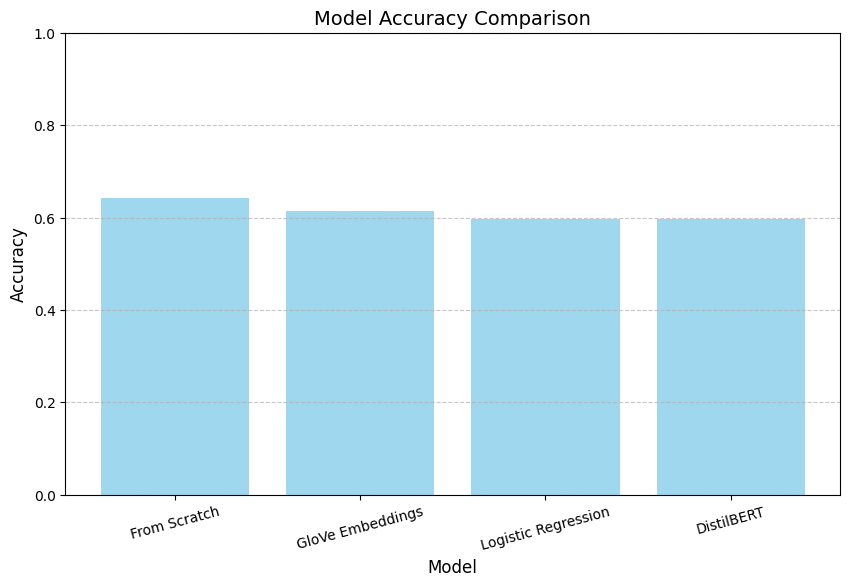

In [28]:
model_names = [model['model'] for model in models_accuracy]
accuracies = [model['accuracy'] for model in models_accuracy]


plt.figure(figsize=(10, 6)) 
plt.bar(model_names, accuracies, alpha=0.8, color='skyblue') 
plt.title("Model Accuracy Comparison", fontsize=14) 
plt.xlabel("Model", fontsize=12)  
plt.ylabel("Accuracy", fontsize=12)  
plt.ylim(0, 1) 
plt.xticks(rotation=15, fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


## upload 4 models to MongoDB!
## upload data **(Aladdin_Pharmacy)** to MongoDB!

<img src="ex3.png" alt="Image Description" width="900">

In [3]:
client = MongoClient("mongodb://localhost:27017/")
db = client["model_database"]

fs = gridfs.GridFS(db)


def upload_models_to_mongo():

    with open("from_scratch_model.pkl", "rb") as f:
        fs.put(f, filename="from_scratch_model.pkl")

   
    with open("glove_model.pkl", "rb") as f:
        fs.put(f, filename="glove_model.pkl")


    with open("logistic_regression_model.pkl", "rb") as f:
        fs.put(f, filename="logistic_regression_model.pkl")

    
    with open("./distilbert_model/model.safetensors", "rb") as f:
        fs.put(f, filename="distilbert_model.safetensors")

  
    with open("./distilbert_model/tokenizer_config.json", "rb") as f:
        fs.put(f, filename="distilbert_tokenizer.json")

    print("All models have been successfully uploaded to MongoDB!")


def upload_csv_to_mongo(file_path="Aladdin_Pharmacy.csv"):
    data = pd.read_csv(file_path)
    data.reset_index(inplace=True)
    data_dict = data.to_dict("records")
    db["pharmacy_data"].insert_many(data_dict)
    print("Data has been successfully uploaded to MongoDB!")


upload_models_to_mongo()
upload_csv_to_mongo("Aladdin_Pharmacy.csv")


All models have been successfully uploaded to MongoDB!
Data has been successfully uploaded to MongoDB!


<img src="ex4.png" alt="Image Description" width="900">
<img src="ex5.png" alt="Image Description" width="900">

# html & css & js

In [ ]:
from IPython.core.display import display, HTML


models = ["from scratch", "GloVe Embeddings", "Logistic Regression Model", "DistilBERT"]


html_code = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Text Input with Model Selection</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #f4f4f9;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }}
        .container {{
            background: #fff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            width: 300px;
        }}
        h1 {{
            font-size: 1.5em;
            text-align: center;
            color: #333;
        }}
        label {{
            font-weight: bold;
            margin-bottom: 5px;
            display: block;
        }}
        input[type="text"], select {{
            width: 100%;
            padding: 10px;
            margin-bottom: 15px;
            border: 1px solid #ccc;
            border-radius: 4px;
        }}
        button {{
            width: 100%;
            padding: 10px;
            background-color: #007BFF;
            color: white;
            border: none;
            border-radius: 4px;
            font-size: 1em;
            cursor: pointer;
        }}
        button:hover {{
            background-color: #0056b3;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>Choose a Model</h1>
        <form id="textModelForm">
            <label for="userText">Enter your text:</label>
            <input type="text" id="userText" name="userText" placeholder="Type here..." required>

            <label for="model">Choose a model:</label>
            <select id="model" name="model" required>
"""


for model in models:
    html_code += f'                <option value="{model}">{model}</option>\n'


html_code += """
            </select>

            <button type="submit">Submit</button>
        </form>
    </div>

    <script>
        document.getElementById("textModelForm").addEventListener("submit", function(event) {{
            event.preventDefault();
            const userText = document.getElementById("userText").value;
            const selectedModel = document.getElementById("model").value;
            alert(`You entered: ${userText}\\nSelected model: ${selectedModel}`);
        }});
    </script>
</body>
</html>
"""


display(HTML(html_code))
